In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
TRAINING_ROUND = 'Training_Round'
EPOCHS = 'Epochs'
SCENARIO = 'Scenario'
EMBEDDING = 'Embedding'
TAGGING_SCHEME = 'Tagging_Scheme'
CAPITALISATION_DIM = 'Capitalisation_Dim'
LOWER = 'Lower'
CHAR_LSTM_DIM = 'Char_LSTM_Dim'
WORD_LSTM_DIM = 'Word_LSTM_Dim'
PRECISION = 'Precision'
RECALL = 'Recall'
F1_SCORE = 'F1_Score'
columns = [TRAINING_ROUND, EPOCHS, SCENARIO, EMBEDDING, TAGGING_SCHEME, CAPITALISATION_DIM, LOWER, CHAR_LSTM_DIM, WORD_LSTM_DIM, PRECISION, RECALL, F1_SCORE]

In [4]:
def outliers_zscore_scipy(values):
    z = np.abs(stats.zscore(values))
    print(z)
    return pd.Series([False if el > 1 else True for el in z]).values

def outliers_modified_z_score(dataframe, label):
    values = dataframe[label]
    threshold = 3.5

    median_y = np.median(values)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in values])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in values]
    removing = np.abs(modified_z_scores) > threshold
    including = np.abs(modified_z_scores) <= threshold
    print('Removing:')
    print(dataframe[removing][label].values)
    print('Keeping:')
    print(dataframe[including][label].values)
    return including

In [5]:
dados_df = pd.read_csv('resultados.csv')
dados_df

,Training_Round,Epochs,Scenario,Embedding,Tagging_Scheme,Capitalisation_Dim,Lower,Char_LSTM_Dim,Word_LSTM_Dim,Precision,Recall,F1_Score
0,0,5,selective,Wang2Vec,iob,False,False,25,100,58.95,54.79,56.79
1,0,5,selective,Wang2Vec,iob,False,False,25,200,61.60,52.06,56.43
2,0,5,selective,Wang2Vec,iob,False,False,50,100,66.50,47.47,55.40
3,0,5,selective,Wang2Vec,iob,False,False,50,200,58.54,50.74,54.36
4,0,5,selective,Wang2Vec,iob,False,True,25,100,66.28,67.73,67.00
5,0,5,selective,Wang2Vec,iob,False,True,25,200,71.00,62.67,66.58
6,0,5,selective,Wang2Vec,iob,False,True,50,100,70.14,65.18,67.57
7,0,5,selective,Wang2Vec,iob,False,True,50,200,66.93,63.57,65.21
8,0,5,selective,Wang2Vec,iob,True,False,25,100,58.62,57.55,58.08
9,0,5,selective,Wang2Vec,iob,True,False,25,200,64.42,50.45,56.59


In [6]:
groups = dados_df.groupby([EPOCHS, EMBEDDING, SCENARIO, TAGGING_SCHEME, CAPITALISATION_DIM, LOWER, CHAR_LSTM_DIM, WORD_LSTM_DIM])

In [7]:
len(groups)

128

In [8]:
first_group = groups.get_group((5,'Wang2Vec','selective','iob',False, True, 50, 200))
first_group

,Training_Round,Epochs,Scenario,Embedding,Tagging_Scheme,Capitalisation_Dim,Lower,Char_LSTM_Dim,Word_LSTM_Dim,Precision,Recall,F1_Score
7,0,5,selective,Wang2Vec,iob,False,True,50,200,66.93,63.57,65.21
39,1,5,selective,Wang2Vec,iob,False,True,50,200,69.12,65.08,67.04
71,2,5,selective,Wang2Vec,iob,False,True,50,200,72.78,63.93,68.07
103,3,5,selective,Wang2Vec,iob,False,True,50,200,63.47,68.59,65.93
135,4,5,selective,Wang2Vec,iob,False,True,50,200,37.58,6.35,10.86
167,5,5,selective,Wang2Vec,iob,False,True,50,200,0.50,0.61,0.55
199,6,5,selective,Wang2Vec,iob,False,True,50,200,69.31,65.58,67.39
231,7,5,selective,Wang2Vec,iob,False,True,50,200,1.84,1.43,1.61
263,8,5,selective,Wang2Vec,iob,False,True,50,200,72.16,63.00,67.27
295,9,5,selective,Wang2Vec,iob,False,True,50,200,19.86,16.03,17.74


In [9]:
outliers_modified_z_score(first_group, F1_SCORE)

Removing:
[10.86  0.55  1.61 17.74]
Keeping:
[65.21 67.04 68.07 65.93 67.39 67.27]


array([ True,  True,  True,  True, False, False,  True, False,  True,
       False])

In [10]:
filtered_groups = []
for group in groups.groups:
    group_df = groups.get_group(group)
    group_df = group_df[outliers_modified_z_score(group_df, F1_SCORE)]
    filtered_groups.append(group_df)

Removing:
[]
Keeping:
[57.64 56.96 56.93 57.88 56.93 53.5  54.98 56.47 58.05 58.61]
Removing:
[1.41 0.  ]
Keeping:
[53.62 56.21 55.25 54.22 56.73 55.04 55.94 56.24]
Removing:
[18.77]
Keeping:
[56.17 55.28 56.59 56.58 55.46 56.03 58.49 56.38 55.84]
Removing:
[21.65 28.01]
Keeping:
[55.96 56.48 56.03 56.71 56.98 56.15 56.42 55.8 ]
Removing:
[]
Keeping:
[65.72 66.78 64.27 64.84 65.68 66.37 65.44 64.51 64.14 64.84]
Removing:
[ 2.19 42.15]
Keeping:
[63.83 63.57 65.6  65.13 64.43 66.08 65.34 62.97]
Removing:
[ 0.   50.69]
Keeping:
[63.18 64.89 65.35 64.86 65.2  65.55 64.45 66.18]
Removing:
[]
Keeping:
[64.59 64.08 64.8  65.13 64.73 65.38 65.59 65.   63.09 63.95]
Removing:
[]
Keeping:
[56.5  54.7  55.35 57.75 55.12 54.58 58.3  54.57 57.67 58.02]
Removing:
[27.68]
Keeping:
[54.87 57.48 56.68 55.05 54.68 55.54 56.96 55.95 56.19]
Removing:
[]
Keeping:
[57.21 55.86 57.84 56.55 56.95 56.86 57.26 56.72 55.82 55.46]
Removing:
[45.43 52.32]
Keeping:
[57.36 55.34 56.31 56.93 56.48 56.89 57.53 56.07]
R

In [11]:
dados_df = pd.concat(filtered_groups)
dados_df

,Training_Round,Epochs,Scenario,Embedding,Tagging_Scheme,Capitalisation_Dim,Lower,Char_LSTM_Dim,Word_LSTM_Dim,Precision,Recall,F1_Score
320,0,5,selective,FastText,iob,False,False,25,100,58.83,56.51,57.64
352,1,5,selective,FastText,iob,False,False,25,100,64.86,50.77,56.96
384,2,5,selective,FastText,iob,False,False,25,100,63.22,51.77,56.93
416,3,5,selective,FastText,iob,False,False,25,100,59.05,56.76,57.88
448,4,5,selective,FastText,iob,False,False,25,100,58.87,55.11,56.93
480,5,5,selective,FastText,iob,False,False,25,100,59.32,48.73,53.50
512,6,5,selective,FastText,iob,False,False,25,100,59.65,50.99,54.98
544,7,5,selective,FastText,iob,False,False,25,100,63.90,50.59,56.47
576,8,5,selective,FastText,iob,False,False,25,100,59.73,56.47,58.05
608,9,5,selective,FastText,iob,False,False,25,100,62.26,55.36,58.61


In [12]:
len(dados_df)

1157

In [13]:
dados_df.columns.values

array(['Training_Round', 'Epochs', 'Scenario', 'Embedding',
       'Tagging_Scheme', 'Capitalisation_Dim', 'Lower', 'Char_LSTM_Dim',
       'Word_LSTM_Dim', 'Precision', 'Recall', 'F1_Score'], dtype=object)

In [14]:
dados_df.groupby(EMBEDDING)[F1_SCORE].describe(percentiles=[])

,count,mean,std,min,50%,max
Embedding,,,,,,
FastText,280.00,60.69,4.48,53.42,58.81,66.90
Glove,287.00,58.84,3.97,50.18,60.31,64.89
Wang2Vec,286.00,61.27,5.27,51.42,58.58,68.26
Word2Vec,304.00,51.56,3.24,42.97,51.92,56.92


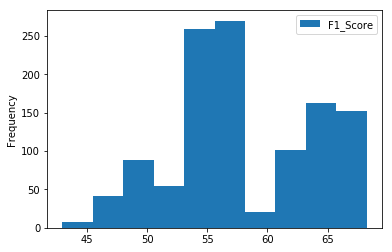

In [15]:
dados_df.plot(kind='hist', x=EMBEDDING, y=F1_SCORE)

In [16]:
def plot_and_save(data_frame, column, title, prefix='plt', save=False):
    data_frame.boxplot(column=F1_SCORE, by=column, showmeans=True, fontsize=16, showfliers=False)
    plt.title(title, fontsize=18)
    plt.suptitle("")
    plt.xlabel("")
    if save == True:
        filename = column.replace(' / ', '_').replace(' ','_').lower()
        plt.savefig(prefix + "_" + filename + ".pdf", bbox_inches='tight')

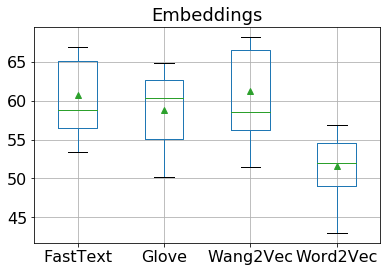

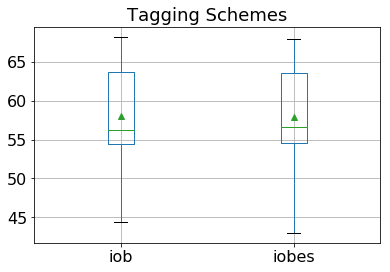

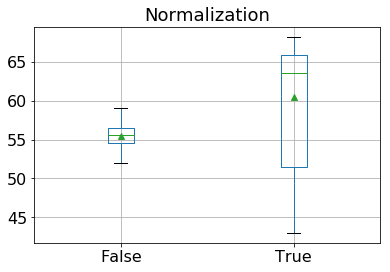

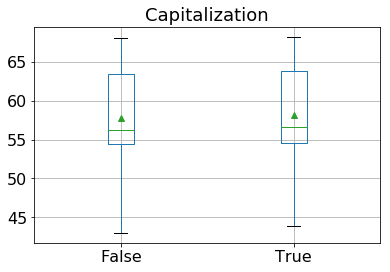

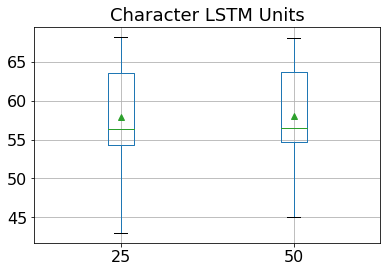

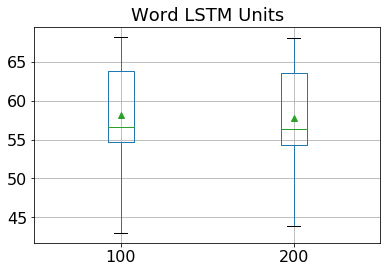

In [17]:
plot_and_save(dados_df, EMBEDDING, 'Embeddings')
plot_and_save(dados_df, TAGGING_SCHEME, 'Tagging Schemes')
plot_and_save(dados_df, LOWER, 'Normalization')
plot_and_save(dados_df, CAPITALISATION_DIM, 'Capitalization')
plot_and_save(dados_df, CHAR_LSTM_DIM, 'Character LSTM Units')
plot_and_save(dados_df, WORD_LSTM_DIM, 'Word LSTM Units')

In [18]:
def renomear_tagging_scheme(row):
    if row[TAGGING_SCHEME] == 'iob':
        return 'IOB2'
    elif row[TAGGING_SCHEME] == 'iobes':
        return 'IOBES'

In [19]:
dados_df[TAGGING_SCHEME] = dados_df.apply(lambda row: renomear_tagging_scheme(row), axis=1)

In [20]:
dados_df

,Training_Round,Epochs,Scenario,Embedding,Tagging_Scheme,Capitalisation_Dim,Lower,Char_LSTM_Dim,Word_LSTM_Dim,Precision,Recall,F1_Score
320,0,5,selective,FastText,IOB2,False,False,25,100,58.83,56.51,57.64
352,1,5,selective,FastText,IOB2,False,False,25,100,64.86,50.77,56.96
384,2,5,selective,FastText,IOB2,False,False,25,100,63.22,51.77,56.93
416,3,5,selective,FastText,IOB2,False,False,25,100,59.05,56.76,57.88
448,4,5,selective,FastText,IOB2,False,False,25,100,58.87,55.11,56.93
480,5,5,selective,FastText,IOB2,False,False,25,100,59.32,48.73,53.50
512,6,5,selective,FastText,IOB2,False,False,25,100,59.65,50.99,54.98
544,7,5,selective,FastText,IOB2,False,False,25,100,63.90,50.59,56.47
576,8,5,selective,FastText,IOB2,False,False,25,100,59.73,56.47,58.05
608,9,5,selective,FastText,IOB2,False,False,25,100,62.26,55.36,58.61


Text(0.5,0,'')

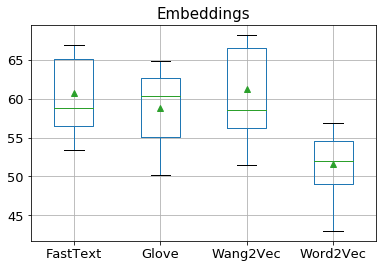

In [21]:
dados_df.boxplot(column=F1_SCORE, by=EMBEDDING, showmeans=True, fontsize=13, showfliers=False)
plt.title('Embeddings', fontsize=15)
plt.suptitle("")
plt.xlabel("")

In [22]:
dados_df.groupby(EMBEDDING)[F1_SCORE].describe()

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
FastText,280.00,60.69,4.48,53.42,56.49,58.81,65.17,66.90
Glove,287.00,58.84,3.97,50.18,55.14,60.31,62.71,64.89
Wang2Vec,286.00,61.27,5.27,51.42,56.26,58.58,66.48,68.26
Word2Vec,304.00,51.56,3.24,42.97,48.97,51.92,54.50,56.92


In [23]:
dados_df.groupby(LOWER)[F1_SCORE].describe()

,count,mean,std,min,25%,50%,75%,max
Lower,,,,,,,,
False,576.00,55.49,1.45,50.18,54.57,55.58,56.53,59.56
True,581.00,60.44,7.29,42.97,51.50,63.61,65.86,68.26


In [24]:
dados_df.groupby(LOWER)[F1_SCORE].describe().to_latex(columns=['count', 'mean','max'])

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  count &  mean &   max \\\\\nLower &        &       &       \\\\\n\\midrule\nFalse & 576.00 & 55.49 & 59.56 \\\\\nTrue  & 581.00 & 60.44 & 68.26 \\\\\n\\bottomrule\n\\end{tabular}\n'

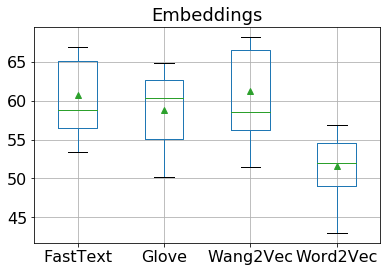

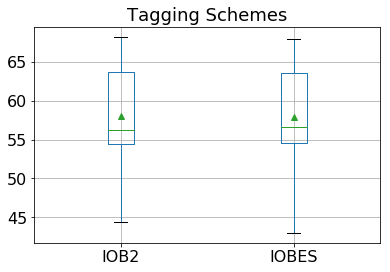

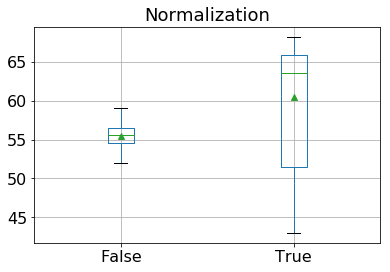

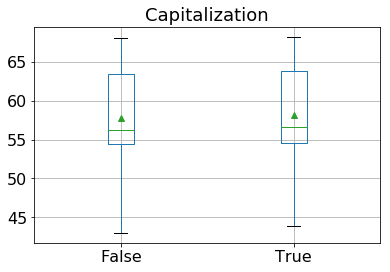

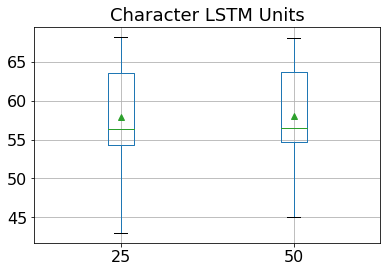

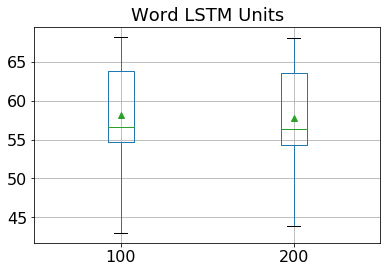

In [25]:
plot_and_save(dados_df, EMBEDDING, 'Embeddings', prefix='plot', save=True)
plot_and_save(dados_df, TAGGING_SCHEME, 'Tagging Schemes', prefix='plot', save=True)
plot_and_save(dados_df, LOWER, 'Normalization', prefix='plot', save=True)
plot_and_save(dados_df, CAPITALISATION_DIM, 'Capitalization', prefix='plot', save=True)
plot_and_save(dados_df, CHAR_LSTM_DIM, 'Character LSTM Units', prefix='plot', save=True)
plot_and_save(dados_df, WORD_LSTM_DIM, 'Word LSTM Units', prefix='plot', save=True)

In [26]:
groups = [EMBEDDING, TAGGING_SCHEME, LOWER, CAPITALISATION_DIM, CHAR_LSTM_DIM, WORD_LSTM_DIM]
for group in groups:
    print(dados_df.groupby(group)[F1_SCORE].describe())

           count  mean  std   min   25%   50%   75%   max
Embedding                                                
FastText  280.00 60.69 4.48 53.42 56.49 58.81 65.17 66.90
Glove     287.00 58.84 3.97 50.18 55.14 60.31 62.71 64.89
Wang2Vec  286.00 61.27 5.27 51.42 56.26 58.58 66.48 68.26
Word2Vec  304.00 51.56 3.24 42.97 48.97 51.92 54.50 56.92
                count  mean  std   min   25%   50%   75%   max
Tagging_Scheme                                                
IOB2           583.00 57.99 5.79 44.34 54.47 56.26 63.77 68.26
IOBES          574.00 57.96 5.85 42.97 54.56 56.63 63.60 67.99
       count  mean  std   min   25%   50%   75%   max
Lower                                                
False 576.00 55.49 1.45 50.18 54.57 55.58 56.53 59.56
True  581.00 60.44 7.29 42.97 51.50 63.61 65.86 68.26
                    count  mean  std   min   25%   50%   75%   max
Capitalisation_Dim                                                
False              574.00 57.82 5.78 42.97 54.46 5

In [27]:
df_groups = dados_df.groupby(groups)[F1_SCORE].describe()
type(df_groups.describe())

pandas.core.frame.DataFrame

In [28]:
df_groups.sort_values(ascending=False, by=['mean'])

count  \
Embedding Tagging_Scheme Lower Capitalisation_Dim Char_LSTM_Dim Word_LSTM_Dim          
Wang2Vec  IOB2           True  False              50            100            10.00   
                               True               25            100             9.00   
                               False              50            200             6.00   
          IOBES          True  True               25            200            10.00   
                                                  50            100             9.00   
          IOB2           True  True               50            100            10.00   
                                                                200             9.00   
          IOBES          True  True               25            100            10.00   
          IOB2           True  True               25            200             7.00   
          IOBES          True  False              50            100             7.00   
                               True               50            200            10.00   
                               False              50            200             9.00   
                                                  25            100             9.00   
          IOB2           True  False              25            200             9.00   
                                                                100             8.00   
          IOBES          True  False              25            200             9.00   
FastText  IOB2           True  True               25            100            10.00   
                                                  50            100             9.00   
          IOBES          True  False              25            100             9.00   
                               True               50            200             8.00   
          IOB2           True  True               25            200             9.00   
                               False              25            100            10.00   
          IOBES          True  True               25            100             7.00   
                               False              50            100             8.00   
          IOB2           True  False              50            100             8.00   
          IOBES          True  False              25            200             9.00   
                               True               25            200            10.00   
          IOB2           True  False              50            200            10.00   
                                                  25            200             8.00   
                               True               50            200             9.00   
          IOBES          True  True               50            100             8.00   
                               False              50            200             8.00   
Glove     IOBES          True  False              50            200             8.00   
          IOB2           True  True               50            100            10.00   
          IOBES          True  True               25            100             9.00   
          IOB2           True  True               25            100             9.00   
          IOBES          True  True               50            200             9.00   
          IOB2           True  False              25            100             9.00   
                                                  50            200             9.00   
          IOBES          True  True               25            200             9.00   
          IOB2           True  False              50            100            10.00   
                               True               50            200             9.00   
          IOBES          True  True               50            100             9.00   
                               False              25            100             8.00   
                               

In [29]:
df_groups.sort_values(ascending=False, by=['max'])

count  \
Embedding Tagging_Scheme Lower Capitalisation_Dim Char_LSTM_Dim Word_LSTM_Dim          
Wang2Vec  IOB2           True  True               25            100             9.00   
                               False              50            200             6.00   
          IOBES          True  True               25            200            10.00   
                               False              50            200             9.00   
                               True               25            100            10.00   
                                                  50            100             9.00   
          IOB2           True  False              25            100             8.00   
                                                  50            100            10.00   
                               True               50            100            10.00   
          IOBES          True  False              25            200             9.00   
                                                  50            100             7.00   
          IOB2           True  True               25            200             7.00   
                                                  50            200             9.00   
                               False              25            200             9.00   
          IOBES          True  False              25            100             9.00   
FastText  IOB2           True  True               25            100            10.00   
                                                  50            100             9.00   
Wang2Vec  IOBES          True  True               50            200            10.00   
FastText  IOB2           True  False              25            100            10.00   
          IOBES          True  False              25            200             9.00   
                                                  50            100             8.00   
                               True               25            200            10.00   
                               False              25            100             9.00   
                               True               50            100             8.00   
          IOB2           True  False              50            100             8.00   
          IOBES          True  True               50            200             8.00   
          IOB2           True  False              25            200             8.00   
                               True               50            200             9.00   
                                                  25            200             9.00   
          IOBES          True  False              50            200             8.00   
                               True               25            100             7.00   
          IOB2           True  False              50            200            10.00   
Glove     IOB2           True  True               50            100            10.00   
          IOBES          True  True               50            100             9.00   
                               False              50            200             8.00   
          IOB2           True  True               25            100             9.00   
                               False              50            100            10.00   
                                                                200             9.00   
                               True               50            200             9.00   
                               False              25            100             9.00   
          IOBES          True  True               50            200             9.00   
                               False              25            100             8.00   
                                                                200             9.00   
          IOB2           True  False              25            200            10.00   
          IOBES          True  

In [30]:
df_groups = df_groups.sort_values(ascending=False, by=['mean'])
df_groups.to_csv('results_by_scenario.csv')

In [31]:
df_groups.head(10).to_latex()

'\\begin{tabular}{llllllrrrrrrrr}\n\\toprule\n         &       &      &       &    &     &  count &  mean &  std &   min &   25\\% &   50\\% &   75\\% &   max \\\\\nEmbedding & Tagging\\_Scheme & Lower & Capitalisation\\_Dim & Char\\_LSTM\\_Dim & Word\\_LSTM\\_Dim &        &       &      &       &       &       &       &       \\\\\n\\midrule\nWang2Vec & IOB2 & True & False & 50 & 100 &  10.00 & 66.90 & 0.72 & 65.44 & 66.42 & 67.11 & 67.49 & 67.69 \\\\\n         &       &      & True  & 25 & 100 &   9.00 & 66.89 & 1.15 & 64.87 & 66.20 & 66.92 & 67.86 & 68.26 \\\\\n         &       &      & False & 50 & 200 &   6.00 & 66.82 & 1.05 & 65.21 & 66.21 & 67.16 & 67.36 & 68.07 \\\\\n         & IOBES & True & True  & 25 & 200 &  10.00 & 66.79 & 0.77 & 65.54 & 66.28 & 66.84 & 67.20 & 67.99 \\\\\n         &       &      &       & 50 & 100 &   9.00 & 66.76 & 0.52 & 66.25 & 66.42 & 66.63 & 66.73 & 67.79 \\\\\n         & IOB2 & True & True  & 50 & 100 &  10.00 & 66.67 & 0.79 & 65.00 & 66.33 & 66.75 

In [32]:
print(df_groups.head(10).to_latex(columns=['mean','max']))

\begin{tabular}{llllllrr}
\toprule
         &       &      &       &    &     &  mean &   max \\
Embedding & Tagging\_Scheme & Lower & Capitalisation\_Dim & Char\_LSTM\_Dim & Word\_LSTM\_Dim &       &       \\
\midrule
Wang2Vec & IOB2 & True & False & 50 & 100 & 66.90 & 67.69 \\
         &       &      & True  & 25 & 100 & 66.89 & 68.26 \\
         &       &      & False & 50 & 200 & 66.82 & 68.07 \\
         & IOBES & True & True  & 25 & 200 & 66.79 & 67.99 \\
         &       &      &       & 50 & 100 & 66.76 & 67.79 \\
         & IOB2 & True & True  & 50 & 100 & 66.67 & 67.64 \\
         &       &      &       &    & 200 & 66.60 & 67.22 \\
         & IOBES & True & True  & 25 & 100 & 66.55 & 67.87 \\
         & IOB2 & True & True  & 25 & 200 & 66.38 & 67.57 \\
         & IOBES & True & False & 50 & 100 & 66.37 & 67.58 \\
\bottomrule
\end{tabular}



In [33]:
df_groups.head(10)

count  \
Embedding Tagging_Scheme Lower Capitalisation_Dim Char_LSTM_Dim Word_LSTM_Dim          
Wang2Vec  IOB2           True  False              50            100            10.00   
                               True               25            100             9.00   
                               False              50            200             6.00   
          IOBES          True  True               25            200            10.00   
                                                  50            100             9.00   
          IOB2           True  True               50            100            10.00   
                                                                200             9.00   
          IOBES          True  True               25            100            10.00   
          IOB2           True  True               25            200             7.00   
          IOBES          True  False              50            100             7.00   

                                                                               mean  \
Embedding Tagging_Scheme Lower Capitalisation_Dim Char_LSTM_Dim Word_LSTM_Dim         
Wang2Vec  IOB2           True  False              50            100           66.90   
                               True               25            100           66.89   
                               False              50            200           66.82   
          IOBES          True  True               25            200           66.79   
                                                  50            100           66.76   
          IOB2           True  True               50            100           66.67   
                                                                200           66.60   
          IOBES          True  True               25            100           66.55   
          IOB2           True  True               25            200           66.38   
          IOBES          True  False              50            100           66.37   

                                                                               std  \
Embedding Tagging_Scheme Lower Capitalisation_Dim Char_LSTM_Dim Word_LSTM_Dim        
Wang2Vec  IOB2           True  False              50            100           0.72   
                               True               25            100           1.15   
                               False              50            200           1.05   
          IOBES          True  True               25            200           0.77   
                                                  50            100           0.52   
          IOB2           True  True               50            100           0.79   
                                                                200           0.44   
          IOBES          True  True               25            100           1.11   
          IOB2           True  True               25            200           0.73   
          IOBES          True  False              50            100           0.87   

                                                                                min  \
Embedding Tagging_Scheme Lower Capitalisation_Dim Char_LSTM_Dim Word_LSTM_Dim         
Wang2Vec  IOB2           True  False              50            100           65.44   
                               True               25            100           64.87   
                               False              50            200           65.21   
          IOBES          True  True               25            200           65.54   
                                                  50            100           66.25   
          IOB2           True  True               50            100           65.00   
                                                                200           65.94   
          IOBES          True  True               25            100           63.99   
          IOB2           True  True               25            200       

In [34]:
len(dados_df)

1157

In [35]:
dados_df.to_csv('resultados_sem_outliers.csv')